# **A binary classification example with neural network**

Here, we are going to classify movie reviews as positive or negative based on the text content of the reviews.

## ***The IMDB dataset***

*It is a set of 50,000 highly polarized reviews from the **Internet Movie Database**. It has been splited into 25,000 reviews for training and 25,000 reviews for testing. Each set consisting 50% negative and 50% of positive reviews.*

**Note:** The IMDB dataset also comes packaged with keras (i.e. already preprocessed). Here, the reviews (sequence of words) have been turned into the sequence of integers, where each integer stands for a specific word in a dictionary.

In [1]:
print("Let's build the IMDB dataset with taking the help of keras")

Let's build the IMDB dataset with taking the help of keras


In [2]:
# loading the IMDB dataset with Keras
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000) # num_words refers top 20,000
# most frequently occuring words


*Here the variables **train_data** and **test_data** are the list of reviews; each reviews is a list of word indices (encoding a sequence of words). **train_labels** and **test_labels**  are list of 0s and 1s, where 0 stands for negative and 1 for positive.*

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data]) # as we are restricting to top 20,000 most frequent words.

9999

In [6]:
#Lets decode one of these reviews back to English words:
word_index = imdb.get_word_index() #word index is a dictionary mapping words to an  integer  index.
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()]) #Reverses it, mapping integer indices to words
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]]) #the indices are offset by 3 as  0,1,2 are reserved for "padding",
#'start of sequence' and 'unknown' respectively
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

## **Preparing the data**

There are two ways to feed the data into a neural network:

1. Convert all the integers to the tensors having same length by padding of zeros and define the first layer (i.e. the embedding layer) appropiately to tackle the shape of the tensor.

2. One hot Encoding: it will turns your data into a vector of 0s and 1s so a simple Dense layer can tackle your data.

We will perform one hot encoding to vectorize the data.

In [7]:
#encoding the integer sequences into a binary matrix
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension)) #creates an all-zero matrix of shape = length of the sequences
  for i,sequence in enumerate(sequences):
    results[i,sequence] = 1 #set specific indices of results[i] to 1s
  return results

In [8]:
#vectorized training and testing data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_train[0])
print()
print(x_test[0])

[0. 1. 1. ... 0. 0. 0.]

[0. 1. 1. ... 0. 0. 0.]


In [9]:
#vectorizing the labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print("train_labels", y_train[0])
print("test_labels", y_test[0])

train_labels 1.0
test_labels 0.0


*Now the data is ready to be fed into a neural network.*

## **Building the neural network**

*As the input data is a vectors and the labels are scalars; a simple stack of fully connected **Dense Layers** with **ReLu activations** will perform the work successfully.*

*Now the following things need to be finalized:*


*   *How many layers to use.*
*   *How many hidden units to choose for each layer.*

*Here, we are using two intermediate layers with 32 hidden units respectively (ReLu activations), and a third output layer for scalar prediction with sigmoid activation.*



In [10]:
#the model definition
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                320032    
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321,905
Trainable params: 321,905
Non-trainable params: 0
_________________________________________________________________


In [11]:
#compile the model by configuring the optimizer with custom losses and metrics
from tensorflow import keras
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=keras.optimizers.RMSprop(lr=0.0001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


## ***Validating the approach***

In [12]:
#Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
print(len(x_val),len(partial_x_train),len(y_val),len(partial_y_train))

10000 15000 10000 15000


In [13]:
#Training the model
history = model.fit(partial_x_train,partial_y_train,epochs=25,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/25
30/30 [==============================] - 3s 65ms/step - loss: 0.6811 - binary_accuracy: 0.6293 - val_loss: 0.6632 - val_binary_accuracy: 0.7329
Epoch 2/25
30/30 [==============================] - 2s 53ms/step - loss: 0.6340 - binary_accuracy: 0.7791 - val_loss: 0.6039 - val_binary_accuracy: 0.7984
Epoch 3/25
30/30 [==============================] - 2s 51ms/step - loss: 0.5642 - binary_accuracy: 0.8371 - val_loss: 0.5405 - val_binary_accuracy: 0.8374
Epoch 4/25
30/30 [==============================] - 1s 50ms/step - loss: 0.4984 - binary_accuracy: 0.8637 - val_loss: 0.4865 - val_binary_accuracy: 0.8549
Epoch 5/25
30/30 [==============================] - 1s 50ms/step - loss: 0.4408 - binary_accuracy: 0.8813 - val_loss: 0.4391 - val_binary_accuracy: 0.8659
Epoch 6/25
30/30 [==============================] - 2s 51ms/step - loss: 0.3893 - binary_accuracy: 0.8929 - val_loss: 0.3979 - val_binary_accuracy: 0.8713
Epoch 7/25
30/30 [==============================] - 2s 50ms/step - los

In [14]:
#let's take a look what the history content
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

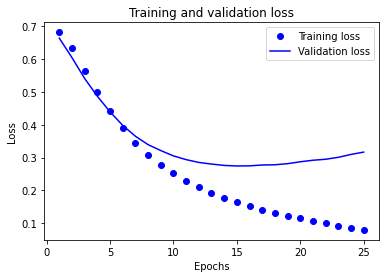

In [15]:
#ploting the training and validation loss
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,26)
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

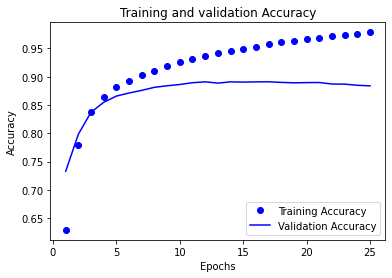

In [16]:
#ploting the training and validation accuracy
import matplotlib.pyplot as plt
loss_values = history_dict['binary_accuracy']
val_loss_values = history_dict['val_binary_accuracy']
epochs = range(1,26)
plt.plot(epochs,loss_values,'bo',label='Training Accuracy')
plt.plot(epochs,val_loss_values,'b',label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
#Testing the model
results = model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.3445 - binary_accuracy: 0.8732


In [18]:
#generate predictions on new data
model.predict(x_test)

array([[0.09994671],
       [0.99986714],
       [0.9540272 ],
       ...,
       [0.03045174],
       [0.03037745],
       [0.62957406]], dtype=float32)

## ***Further Experiments***

In [19]:
#the model definition
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64,activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64,activation='tanh'))
model.add(layers.Dense(32,activation='tanh'))
model.add(layers.Dense(32,activation='tanh'))
model.add(layers.Dense(16,activation='tanh'))
model.add(layers.Dense(16,activation='tanh'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                640064    
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dense_11 (Dense)            (None, 1)                

In [20]:
#compile the model by configuring the optimizer with custom losses and metrics
from tensorflow import keras
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=keras.optimizers.Adam(lr=0.0001), loss=losses.mse, metrics=[metrics.binary_accuracy])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [21]:
#Training the model
history = model.fit(partial_x_train,partial_y_train,epochs=10,batch_size=256,validation_data=(x_val,y_val))

Epoch 1/10
59/59 [==============================] - 3s 43ms/step - loss: 0.2053 - binary_accuracy: 0.7215 - val_loss: 0.1524 - val_binary_accuracy: 0.8320
Epoch 2/10
59/59 [==============================] - 2s 37ms/step - loss: 0.1113 - binary_accuracy: 0.8813 - val_loss: 0.1012 - val_binary_accuracy: 0.8753
Epoch 3/10
59/59 [==============================] - 2s 36ms/step - loss: 0.0706 - binary_accuracy: 0.9233 - val_loss: 0.0883 - val_binary_accuracy: 0.8825
Epoch 4/10
59/59 [==============================] - 2s 37ms/step - loss: 0.0500 - binary_accuracy: 0.9485 - val_loss: 0.0866 - val_binary_accuracy: 0.8844
Epoch 5/10
59/59 [==============================] - 2s 39ms/step - loss: 0.0364 - binary_accuracy: 0.9646 - val_loss: 0.0874 - val_binary_accuracy: 0.8812
Epoch 6/10
59/59 [==============================] - 2s 37ms/step - loss: 0.0270 - binary_accuracy: 0.9768 - val_loss: 0.0897 - val_binary_accuracy: 0.8809
Epoch 7/10
59/59 [==============================] - 2s 37ms/step - los

In [22]:
#let's take a look what the history content
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

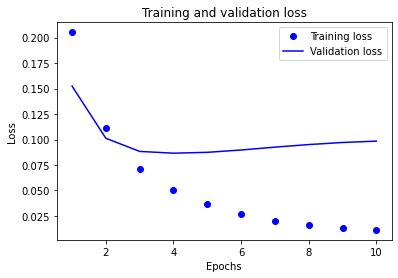

In [23]:
#ploting the training and validation loss
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,11)
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

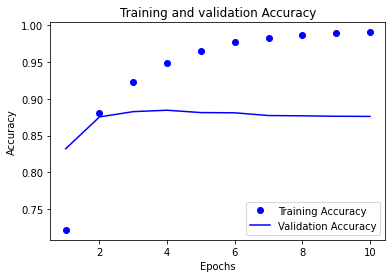

In [24]:
#ploting the training and validation accuracy
import matplotlib.pyplot as plt
loss_values = history_dict['binary_accuracy']
val_loss_values = history_dict['val_binary_accuracy']
epochs = range(1,11)
plt.plot(epochs,loss_values,'bo',label='Training Accuracy')
plt.plot(epochs,val_loss_values,'b',label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
#Testing the model
results = model.evaluate(x_test,y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.1059 - binary_accuracy: 0.8670


In [26]:
#generate predictions on new data
model.predict(x_test)

array([[0.05096027],
       [0.97151226],
       [0.9534374 ],
       ...,
       [0.04028207],
       [0.05849656],
       [0.93330705]], dtype=float32)

In [27]:
#Original
model_1 = models.Sequential()
model_1.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model_1.add(layers.Dense(16,activation='relu'))
model_1.add(layers.Dense(1,activation='sigmoid'))
#model_1.summary()
model_1.compile(optimizer=keras.optimizers.RMSprop(lr=0.0001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])
history_1 = model_1.fit(partial_x_train,partial_y_train,epochs=10,batch_size=512,validation_data=(x_val,y_val))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/10
30/30 [==============================] - 4s 92ms/step - loss: 0.6833 - binary_accuracy: 0.5756 - val_loss: 0.6722 - val_binary_accuracy: 0.5980
Epoch 2/10
30/30 [==============================] - 1s 44ms/step - loss: 0.6550 - binary_accuracy: 0.6904 - val_loss: 0.6428 - val_binary_accuracy: 0.7151
Epoch 3/10
30/30 [==============================] - 1s 44ms/step - loss: 0.6220 - binary_accuracy: 0.7685 - val_loss: 0.6127 - val_binary_accuracy: 0.7975
Epoch 4/10
30/30 [==============================] - 1s 45ms/step - loss: 0.5898 - binary_accuracy: 0.8192 - val_loss: 0.5839 - val_binary_accuracy: 0.8097
Epoch 5/10
30/30 [==============================] - 1s 44ms/step - loss: 0.5587 - binary_accuracy: 0.8392 - val_loss: 0.5566 - val_binary_accuracy: 0.8321
Epoch 6/10
30/30 [==============================] - 1s 44ms/step - loss: 0.5289 - binary_accuracy: 0.8558 - val_loss: 0.5301 - val_binary_accuracy: 0.8381
Epoch 7/10
30/30 [==============================] - 1s 45ms/step - los

In [28]:
# model with lower capacity
model_2 = models.Sequential()
model_2.add(layers.Dense(4,activation='relu', input_shape=(10000,)))
model_2.add(layers.Dense(4,activation='relu'))
model_2.add(layers.Dense(1,activation='sigmoid'))
#model_1.summary()
model_2.compile(optimizer=keras.optimizers.RMSprop(lr=0.0001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])
history_2 = model_2.fit(partial_x_train,partial_y_train,epochs=10,batch_size=512,validation_data=(x_val,y_val))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/10
30/30 [==============================] - 2s 53ms/step - loss: 0.6916 - binary_accuracy: 0.5192 - val_loss: 0.6870 - val_binary_accuracy: 0.5765
Epoch 2/10
30/30 [==============================] - 1s 42ms/step - loss: 0.6779 - binary_accuracy: 0.6469 - val_loss: 0.6686 - val_binary_accuracy: 0.6866
Epoch 3/10
30/30 [==============================] - 1s 42ms/step - loss: 0.6544 - binary_accuracy: 0.7278 - val_loss: 0.6452 - val_binary_accuracy: 0.7533
Epoch 4/10
30/30 [==============================] - 1s 41ms/step - loss: 0.6293 - binary_accuracy: 0.7837 - val_loss: 0.6227 - val_binary_accuracy: 0.7795
Epoch 5/10
30/30 [==============================] - 1s 41ms/step - loss: 0.6056 - binary_accuracy: 0.8125 - val_loss: 0.6019 - val_binary_accuracy: 0.8044
Epoch 6/10
30/30 [==============================] - 1s 41ms/step - loss: 0.5833 - binary_accuracy: 0.8352 - val_loss: 0.5822 - val_binary_accuracy: 0.8207
Epoch 7/10
30/30 [==============================] - 1s 41ms/step - los

In [29]:
model_3 = models.Sequential()
model_3.add(layers.Dense(512,activation='relu', input_shape=(10000,)))
model_3.add(layers.Dense(512,activation='relu'))
model_3.add(layers.Dense(1,activation='sigmoid'))
#model_1.summary()
model_3.compile(optimizer=keras.optimizers.RMSprop(lr=0.0001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])
history_3 = model_3.fit(partial_x_train,partial_y_train,epochs=10,batch_size=512,validation_data=(x_val,y_val))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/10
30/30 [==============================] - 9s 293ms/step - loss: 0.5667 - binary_accuracy: 0.7753 - val_loss: 0.4412 - val_binary_accuracy: 0.8445
Epoch 2/10
30/30 [==============================] - 9s 287ms/step - loss: 0.3447 - binary_accuracy: 0.8849 - val_loss: 0.3255 - val_binary_accuracy: 0.8787
Epoch 3/10
30/30 [==============================] - 9s 288ms/step - loss: 0.2420 - binary_accuracy: 0.9185 - val_loss: 0.3032 - val_binary_accuracy: 0.8805
Epoch 4/10
30/30 [==============================] - 9s 287ms/step - loss: 0.1889 - binary_accuracy: 0.9366 - val_loss: 0.2791 - val_binary_accuracy: 0.8921
Epoch 5/10
30/30 [==============================] - 9s 288ms/step - loss: 0.1481 - binary_accuracy: 0.9546 - val_loss: 0.2781 - val_binary_accuracy: 0.8876
Epoch 6/10
30/30 [==============================] - 9s 288ms/step - loss: 0.1167 - binary_accuracy: 0.9656 - val_loss: 0.2976 - val_binary_accuracy: 0.8847
Epoch 7/10
30/30 [==============================] - 9s 288ms/ste

In [30]:
# Adding L1 regularization
from keras import regularizers
model_4 = models.Sequential()
model_4.add(layers.Dense(16,kernel_regularizer = regularizers.l1(0.001), activation='relu', input_shape=(10000,)))
model_4.add(layers.Dense(16,kernel_regularizer = regularizers.l1(0.001), activation='relu'))
model_4.add(layers.Dense(1,activation='sigmoid'))
#model_1.summary()
model_4.compile(optimizer=keras.optimizers.RMSprop(lr=0.0001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])
history_4 = model_4.fit(partial_x_train,partial_y_train,epochs=10,batch_size=512,validation_data=(x_val,y_val))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/10
30/30 [==============================] - 3s 69ms/step - loss: 2.3903 - binary_accuracy: 0.5057 - val_loss: 2.1440 - val_binary_accuracy: 0.4999
Epoch 2/10
30/30 [==============================] - 1s 44ms/step - loss: 1.9607 - binary_accuracy: 0.5116 - val_loss: 1.7710 - val_binary_accuracy: 0.5066
Epoch 3/10
30/30 [==============================] - 1s 44ms/step - loss: 1.6147 - binary_accuracy: 0.5373 - val_loss: 1.4560 - val_binary_accuracy: 0.5526
Epoch 4/10
30/30 [==============================] - 1s 44ms/step - loss: 1.3253 - binary_accuracy: 0.6059 - val_loss: 1.1967 - val_binary_accuracy: 0.6155
Epoch 5/10
30/30 [==============================] - 1s 44ms/step - loss: 1.0920 - binary_accuracy: 0.6679 - val_loss: 0.9933 - val_binary_accuracy: 0.6987
Epoch 6/10
30/30 [==============================] - 1s 47ms/step - loss: 0.9140 - binary_accuracy: 0.7115 - val_loss: 0.8449 - val_binary_accuracy: 0.7019
Epoch 7/10
30/30 [==============================] - 2s 55ms/step - los

In [31]:
# Adding L2 regularization
from keras import regularizers
model_5 = models.Sequential()
model_5.add(layers.Dense(16,kernel_regularizer = regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model_5.add(layers.Dense(16,kernel_regularizer = regularizers.l2(0.001), activation='relu'))
model_5.add(layers.Dense(1,activation='sigmoid'))
#model_1.summary()
model_5.compile(optimizer=keras.optimizers.RMSprop(lr=0.0001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])
history_5 = model_5.fit(partial_x_train,partial_y_train,epochs=10,batch_size=512,validation_data=(x_val,y_val))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/10
30/30 [==============================] - 3s 69ms/step - loss: 0.7327 - binary_accuracy: 0.5667 - val_loss: 0.7202 - val_binary_accuracy: 0.6223
Epoch 2/10
30/30 [==============================] - 1s 45ms/step - loss: 0.6997 - binary_accuracy: 0.6874 - val_loss: 0.6832 - val_binary_accuracy: 0.7243
Epoch 3/10
30/30 [==============================] - 1s 47ms/step - loss: 0.6578 - binary_accuracy: 0.7721 - val_loss: 0.6422 - val_binary_accuracy: 0.7802
Epoch 4/10
30/30 [==============================] - 1s 46ms/step - loss: 0.6139 - binary_accuracy: 0.8217 - val_loss: 0.6055 - val_binary_accuracy: 0.8169
Epoch 5/10
30/30 [==============================] - 1s 45ms/step - loss: 0.5754 - binary_accuracy: 0.8482 - val_loss: 0.5732 - val_binary_accuracy: 0.8315
Epoch 6/10
30/30 [==============================] - 2s 56ms/step - loss: 0.5411 - binary_accuracy: 0.8639 - val_loss: 0.5438 - val_binary_accuracy: 0.8428
Epoch 7/10
30/30 [==============================] - 1s 46ms/step - los

In [32]:
# Adding L1_L2 regularization
from keras import regularizers
model_6 = models.Sequential()
model_6.add(layers.Dense(16,kernel_regularizer = regularizers.l1_l2(0.001), activation='relu', input_shape=(10000,)))
model_6.add(layers.Dense(16,kernel_regularizer = regularizers.l1_l2(0.001), activation='relu'))
model_6.add(layers.Dense(1,activation='sigmoid'))
#model_1.summary()
model_6.compile(optimizer=keras.optimizers.RMSprop(lr=0.0001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])
history_6 = model_6.fit(partial_x_train,partial_y_train,epochs=10,batch_size=512,validation_data=(x_val,y_val))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/10
30/30 [==============================] - 3s 79ms/step - loss: 2.7729 - binary_accuracy: 0.5152 - val_loss: 2.4743 - val_binary_accuracy: 0.5269
Epoch 2/10
30/30 [==============================] - 1s 48ms/step - loss: 2.2565 - binary_accuracy: 0.5519 - val_loss: 2.0320 - val_binary_accuracy: 0.5786
Epoch 3/10
30/30 [==============================] - 1s 47ms/step - loss: 1.8489 - binary_accuracy: 0.6297 - val_loss: 1.6627 - val_binary_accuracy: 0.6546
Epoch 4/10
30/30 [==============================] - 1s 47ms/step - loss: 1.5125 - binary_accuracy: 0.6999 - val_loss: 1.3653 - val_binary_accuracy: 0.6981
Epoch 5/10
30/30 [==============================] - 1s 47ms/step - loss: 1.2463 - binary_accuracy: 0.7460 - val_loss: 1.1347 - val_binary_accuracy: 0.7602
Epoch 6/10
30/30 [==============================] - 1s 48ms/step - loss: 1.0456 - binary_accuracy: 0.7794 - val_loss: 0.9678 - val_binary_accuracy: 0.7973
Epoch 7/10
30/30 [==============================] - 2s 60ms/step - los

In [34]:
model_7 = models.Sequential()
model_7.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model_7.add(layers.Dropout(0.2))
model_7.add(layers.Dense(16,activation='relu'))
model_7.add(layers.Dropout(0.4))
model_7.add(layers.Dense(1,activation='sigmoid'))
#model_1.summary()
model_7.compile(optimizer=keras.optimizers.RMSprop(lr=0.0001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])
history_7 = model_7.fit(partial_x_train,partial_y_train,epochs=10,batch_size=512,validation_data=(x_val,y_val))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/10
30/30 [==============================] - 3s 68ms/step - loss: 0.6854 - binary_accuracy: 0.5501 - val_loss: 0.6731 - val_binary_accuracy: 0.6628
Epoch 2/10
30/30 [==============================] - 1s 45ms/step - loss: 0.6641 - binary_accuracy: 0.6276 - val_loss: 0.6472 - val_binary_accuracy: 0.7286
Epoch 3/10
30/30 [==============================] - 1s 46ms/step - loss: 0.6372 - binary_accuracy: 0.6753 - val_loss: 0.6197 - val_binary_accuracy: 0.7619
Epoch 4/10
30/30 [==============================] - 1s 44ms/step - loss: 0.6128 - binary_accuracy: 0.7055 - val_loss: 0.5927 - val_binary_accuracy: 0.8074
Epoch 5/10
30/30 [==============================] - 1s 45ms/step - loss: 0.5906 - binary_accuracy: 0.7325 - val_loss: 0.5673 - val_binary_accuracy: 0.8231
Epoch 6/10
30/30 [==============================] - 1s 45ms/step - loss: 0.5679 - binary_accuracy: 0.7515 - val_loss: 0.5429 - val_binary_accuracy: 0.8365
Epoch 7/10
30/30 [==============================] - 2s 58ms/step - los

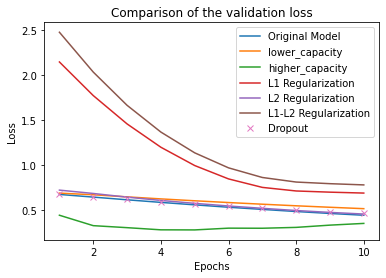

In [36]:
#ploting the training and validation loss
import matplotlib.pyplot as plt
val_loss_values_1 = history_1.history['val_loss']
val_loss_values_2 = history_2.history['val_loss']
val_loss_values_3 = history_3.history['val_loss']
val_loss_values_4 = history_4.history['val_loss']
val_loss_values_5 = history_5.history['val_loss']
val_loss_values_6 = history_6.history['val_loss']
val_loss_values_7 = history_7.history['val_loss']
epochs = range(1,11)
#plt.plot(epochs,loss_values, label='Training loss')
plt.plot(epochs,val_loss_values_1,label='Original Model')
plt.plot(epochs,val_loss_values_2,label='lower_capacity')
plt.plot(epochs,val_loss_values_3,label='higher_capacity')
plt.plot(epochs,val_loss_values_4,label='L1 Regularization')
plt.plot(epochs,val_loss_values_5,label='L2 Regularization')
plt.plot(epochs,val_loss_values_6,label='L1-L2 Regularization')
plt.plot(epochs,val_loss_values_7,'x',label='Dropout')
plt.title('Comparison of the validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()